<a href="https://colab.research.google.com/github/kelvinchiluwe/advanced_machine_learning_algorithms/blob/main/digits_recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,970 (35.04 KB)

 Trainable params: 8,970 (35.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

model_checkpoint = ModelCheckpoint(filepath='best_digit_model.keras', save_best_only=True, monitor='val_loss')



In [ ]:
print("Starting Training with Callbacks ")

history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),

                    callbacks=[early_stopping, model_checkpoint],
                    verbose=1)


Starting Training with Callbacks 
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.1764 - loss: 2.3326 - val_accuracy: 0.7000 - val_loss: 1.3840
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5652 - loss: 1.3973 - val_accuracy: 0.8222 - val_loss: 0.7423
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7301 - loss: 0.9228 - val_accuracy: 0.8917 - val_loss: 0.4603
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8098 - loss: 0.6821 - val_accuracy: 0.9222 - val_loss: 0.3218
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8507 - loss: 0.5307 - val_accuracy: 0.9389 - val_loss: 0.2439
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8799 - loss: 0.4154 - val_accuracy: 0.9556 - val_loss: 0.2043
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8967 - loss: 0.3476 - val_accuracy: 0.9611 - val_loss: 0.1777
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8969 - loss

In [ ]:
best_model = load_model('best_digit_model.keras')
print("Evaluating with Classification Report and Confusion Matrix ")

y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


Evaluating with Classification Report and Confusion Matrix 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[1.1847391e-05 2.0861141e-07 4.2415161e-07 ... 5.0054041e-08
  2.9824257e-06 7.8665288e-08]
 [6.5113959e-06 1.6454447e-07 8.1395468e-10 ... 2.5805325e-06
  1.1502233e-06 9.9502170e-01]
 [1.0542843e-10 2.8437702e-08 1.1173802e-06 ... 6.1640272e-08
  8.2378267e-07 2.5177920e-05]
 ...
 [4.6751983e-03 4.1607125e-03 1.3390287e-03 ... 5.5598676e-02
  4.0732759e-01 1.7611663e-01]
 [1.8944469e-06 6.9376915e-06 1.4592205e-04 ... 7.4425388e-06
  9.4556322e-05 1.5180745e-02]
 [2.4200526e-06 2.3698936e-09 9.2427088e-10 ... 3.0029330e-08
  3.9509283e-07 2.3048038e-04]]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 4 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 2 9 3 7 7 2 9 0 4 5

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.92      0.98      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Confusion Matrix:


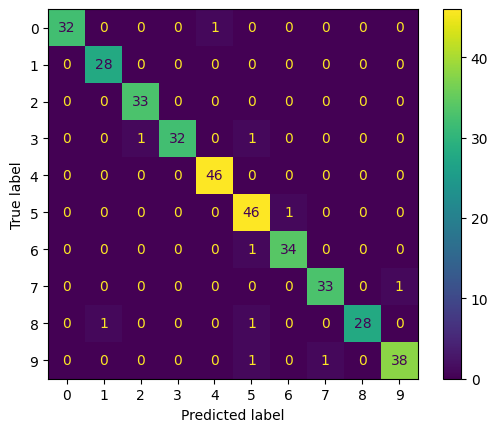

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()